In [57]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
import graphviz

def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [44]:
penguins = sns.load_dataset("penguins")
penguins = penguins.dropna()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [45]:
pen_train, pen_test = train_test_split(penguins, test_size=0.3, random_state=42, stratify=penguins['island'])
print(pen_train.shape, pen_test.shape)

(233, 7) (100, 7)


In [67]:
features= ['bill_length_mm', 'bill_depth_mm']
dt_classification = DecisionTreeClassifier(max_depth = 15)
dt_classification.fit(pen_train[features], pen_train['island'])

DecisionTreeClassifier(max_depth=15)

In [68]:
predictions = dt_classification.predict(penguins[features])
predictions
calculate_accuracy(predictions, penguins.island)

0.8678678678678678

Do I expect a difference in accuracy?
    - Yes, since the training set is larger than the test set (by 40%), I expect the training set to be more accurate.

In [69]:
predictionsOnTrainset = dt_classification.predict(pen_train[features])
predictionsOnTestset = dt_classification.predict(pen_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, pen_train.island)
accuracyTest = calculate_accuracy(predictionsOnTestset, pen_test.island)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.9613733905579399
Accuracy on test set 0.65


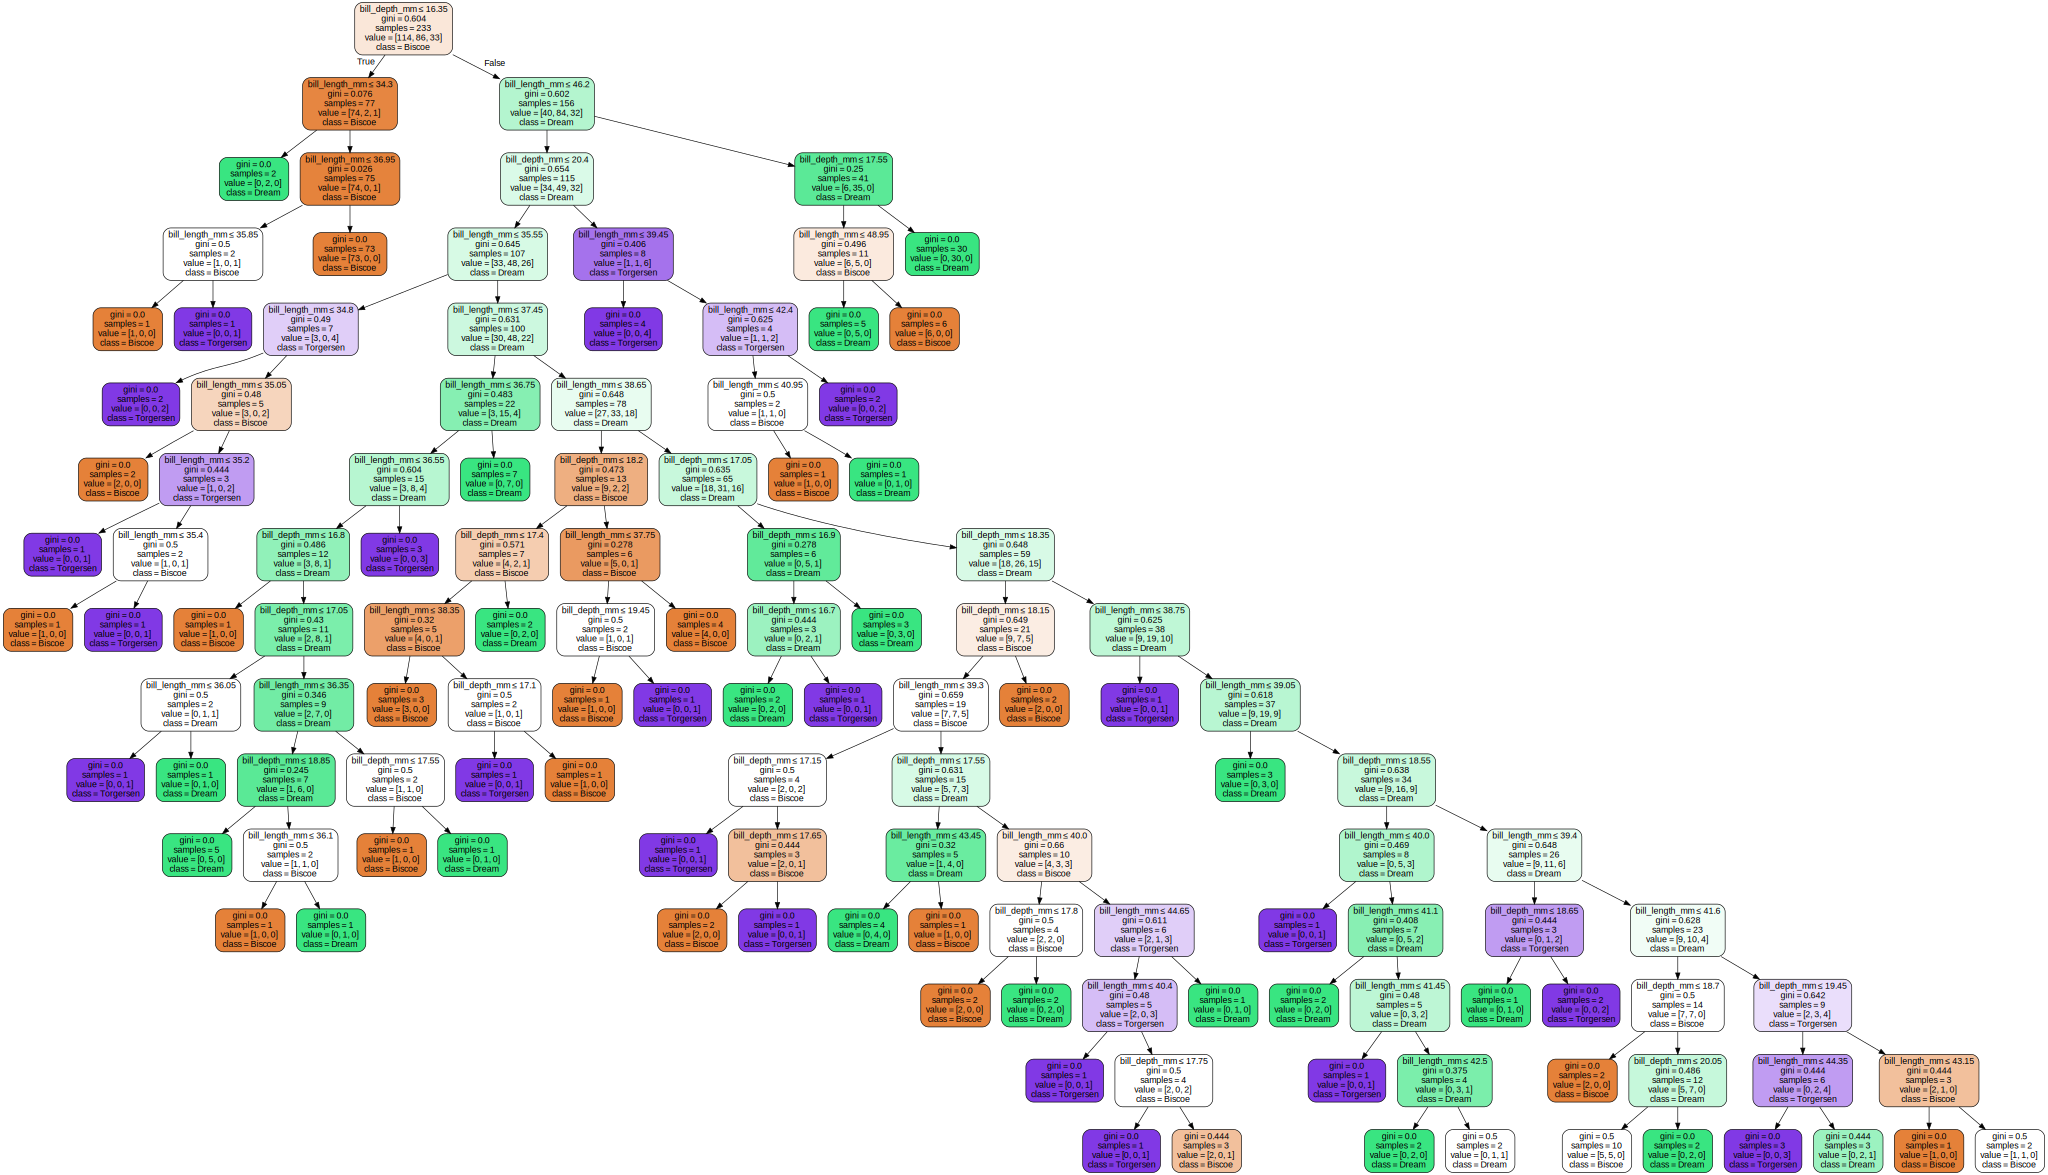

In [70]:
plot_tree_classification(dt_classification, features, np.sort(pen_test.island.unique()))